In [ ]:

# Numpy Library for Numerical Calculations
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Matplotlib and for Plottings
import matplotlib.pyplot as plt

# Pickle Library for Saving the Model
import pickle

# RE Library for Regular Expression
import re

# NLTK Library for Natural Language Processing
import nltk
nltk.download('stopwords') # Downloading the Stopwords

# Stopwords for removing stopwords in the Text
from nltk.corpus import stopwords

# PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

# CountVectorizer for Bagging of Words and Vectorizing it
from sklearn.feature_extraction.text import CountVectorizer

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# Decision Tree Classifier, Random Forest Classifier and Multinomial Naïve Bayes are Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Accuracy Score and Confusion Matrix is for Analysis of Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
spam = pd.read_csv("/content/drive/MyDrive/mailspam.csv", encoding='ISO-8859-1')
spam.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


Checking for null values in Data

In [6]:
spam.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


Checking for first 5 Values in Data

In [7]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Checking for Last 5 Values in Data

In [8]:
spam.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


Taking the required column in dataset

In [9]:
spam = spam[['v1', 'v2']]
spam.columns = ['label', 'message']
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Dimension Of the Dataset

In [ ]:
spam.shape

(5572, 2)

Checking for Classes in Data

In [ ]:
spam.groupby('label').size()

,0
label,
ham,4825
spam,747


Plotting

Plotting the label in dataset


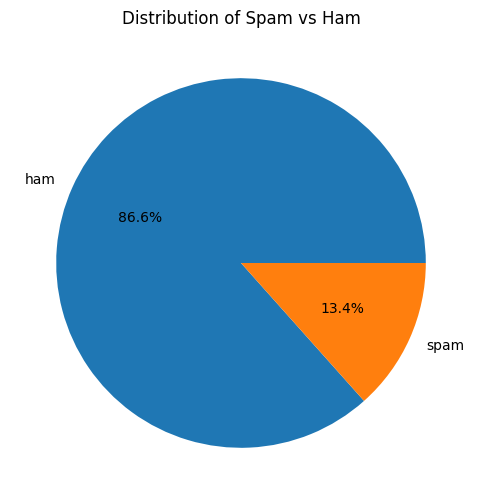

In [10]:
spam['label'].value_counts().plot(kind='pie', figsize=(9,6) , autopct='%1.1f%%')
plt.title('Distribution of Spam vs Ham')
plt.ylabel('')  # Hides the y-label
plt.show()

**NLP**

Preprocessing The  Texts in the Datasets

In [11]:

ps = PorterStemmer()
corpus = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

    # Printing the first 5 values in the corpus list
corpus[1:11]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today']

Creating Bag of words Model

In [12]:
cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values


**Data** **Modeling**

Splitting the Dataset into Training and Testing Set

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)


**Model** **Building**

Creating and Trainining the Models


In [14]:
from sklearn.neural_network import MLPClassifier # ANN MLP Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.preprocessing import StandardScaler


#Scale  Features for Better Experience
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Creating and Training Models

# Model 1 - Decision Tree Classifi4er
dt = DecisionTreeClassifier(random_state=45)
dt.fit(X_train, Y_train)

# Model 2 - Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, Y_train)

# Model 3 -MLP Classifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, Y_train)

# Model 4 - Logistic Regresssion
lgr = LogisticRegression(random_state=45, max_iter=800)
lgr.fit(X_train_scaled, Y_train)

# Model 5 - Multinomial Naïve Bayes
mnvb = MultinomialNB()
mnvb.fit(X_train, Y_train)

MultinomialNB()

**Prediction** **And** **Testing** **Of** **Models**

In [15]:
# Pediction Of Decision Tree Model
dt_pred=dt.predict(X_test_scaled)

# Pediction Of Random Forest Model
rf_pred=rf.predict(X_test_scaled)

# Pediction OfANN MLP Classifier Model
mlp_pred=mlp.predict(X_test_scaled)

# Prediction Of Logistic Regression Model
lgr_pred=lgr.predict(X_test_scaled)

# Prediction Of Multinomial Naive Bayes model
mnvb_pred=mnvb.predict(X_test)

**Evaluation** **Of** **Models**

In [16]:
# Model 1 - Decision Tree Classifier
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, dt_pred))
print("Accuracy: ", accuracy_score(Y_test, dt_pred))
print("_________________________________________________")

# Model 2 - Random Forest Classifier
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, rf_pred))
print("Accuracy: ", accuracy_score(Y_test, rf_pred))
print("_________________________________________________")


# Model 3 - MLP Classifier
print("MLP Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, mlp_pred))
print("Accuracy: ", accuracy_score(Y_test, mlp_pred))
print("_________________________________________________")


# Model 4 - Logistic Regression
print("Logistic Regresssion")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, lgr_pred))
print("Accuracy: ", accuracy_score(Y_test, lgr_pred))
print("_________________________________________________")



# Model 5 - Multinomial Naïve Bayes
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, mnvb_pred))
print("Accuracy: ", accuracy_score(Y_test, mnvb_pred))

Decision Tree Classifier
Confusion Matrix: 
[[944  21]
 [ 24 126]]
Accuracy:  0.9596412556053812
_________________________________________________
Random Forest Classifier
Confusion Matrix: 
[[964   1]
 [ 23 127]]
Accuracy:  0.97847533632287
_________________________________________________
MLP Classifier
Confusion Matrix: 
[[793 172]
 [  6 144]]
Accuracy:  0.8403587443946189
_________________________________________________
Logistic Regresssion
Confusion Matrix: 
[[959   6]
 [ 19 131]]
Accuracy:  0.9775784753363229
_________________________________________________
Multinomial Naïve Bayes
Confusion Matrix: 
[[952  13]
 [  9 141]]
Accuracy:  0.9802690582959641


<Axes: >

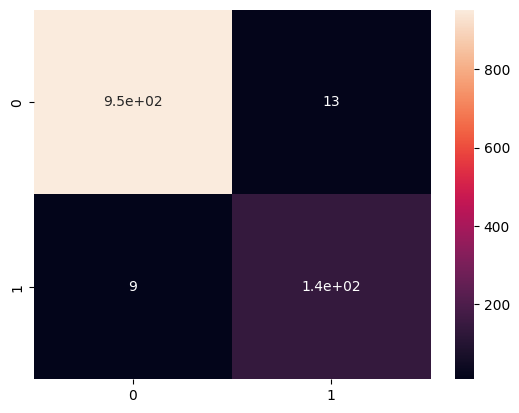

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, mnvb_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)


In [18]:
dt_report = classification_report(Y_test, dt_pred)
print("Classification Report for Decision Tree Classifier \n", dt_report)

rf_report = classification_report(Y_test, rf_pred)
print("Classification Report for Random Forest Classifier \n", rf_report)

mlp_report = classification_report(Y_test, mlp_pred)
print("Classification Report for MLP Classifier \n", mlp_report)

lgr_report = classification_report(Y_test, lgr_pred)
print("Classification Report for Logistic Regression \n", lgr_report)

mnvb_report = classification_report(Y_test, mnvb_pred)
print("Classification Report for Multinomial Naïve Bayes \n", mnvb_report)



Classification Report for Decision Tree Classifier 
               precision    recall  f1-score   support

       False       0.98      0.98      0.98       965
        True       0.86      0.84      0.85       150

    accuracy                           0.96      1115
   macro avg       0.92      0.91      0.91      1115
weighted avg       0.96      0.96      0.96      1115

Classification Report for Random Forest Classifier 
               precision    recall  f1-score   support

       False       0.98      1.00      0.99       965
        True       0.99      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Classification Report for MLP Classifier 
               precision    recall  f1-score   support

       False       0.99      0.82      0.90       965
        True       0.46      0.96      0.62       150

    accuracy                     

Multinomial Naive Bayes Classifier is the Best model

In [19]:

filename = "RFC.pkl"
pickle.dump(rf, open(filename, 'wb'))
filename = "DTC.pkl"
pickle.dump(dt, open(filename, 'wb'))
filename = "MNB.pkl"
pickle.dump(mnvb, open(filename, 'wb'))
filename = "LR.pkl"
pickle.dump(lgr, open(filename, 'wb'))
filename = "MLP.pkl"
pickle.dump(mlp, open(filename, 'wb'))
print("Saved all Models")

Saved all Models
